# Session 11: Text Analysis

*Nicklas Johansen*

## Agenda

In this session you will be introduced to `text analysis`: 
- NLP, NLTK & Sentiment Analysis
- Compiling Data
- Creating Frequency Distributions
- Extracting Concordance and Collocations
- VADER Sentiment Analyzer
- AFINN Sentiment Analyzer

**Remember** that you can always built your own function! 

## NLP, NLTK & Sentiment Analysis

1. **Natural language processing (NLP)** is the application of computational techniques to the analysis and synthesis of natural language and speech. [Link](https://en.wikipedia.org/wiki/Natural_language_processing).


2. **The Natural Language Toolkit (NLTK)** library contains various utilities that allow you to effectively manipulate and analyze linguistic data. Among its advanced features are text classifiers that you can use for many kinds of classification, including sentiment analysis. [Link](https://www.nltk.org/).


3. **Sentiment analysis** is the practice of using algorithms to classify various samples of related text into overall positive and negative categories. With NLTK, you can employ these algorithms through powerful built-in machine learning operations to obtain insights from linguistic data. Sentiment analysis has many other names:
    - Opinion	extraction
    - Opinion	mining
    - Sentiment	mining
    - Subjectivity	analysis

**Why sentiment analysis?**
- Movie: is this review positive or negative?
- Products: what do people think about the new iPhone?
- Public sentiment: how is consumer confidence? Is despair increasing?
- Politics: what do people think about this candidate or issue?
- Prediction: predict election outcomes or market trends from sentiment

**How to do sentiment analysis?**   
It may consist of many steps and require you to do a lot of data manipulation

![](https://cdn-images-1.medium.com/max/361/0*ga5rNPmVYBsCm-lz.)


**How do I get started with NLTK?**   

One way to install NLTK:

In [1]:
!pip install nltk

We can use nltk.download() to download specific packages:

In [2]:
import nltk
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt"
])




[nltk_data] Downloading package names to
[nltk_data]     /Users/nicklasjohansen/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicklasjohansen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/nicklasjohansen/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/nicklasjohansen/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/nicklasjohansen/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nicklasjohansen/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloa

True

## Compiling Data
NLTK provides a number of functions that you can call with few or no arguments that will help you meaningfully analyze text before you even touch its machine learning capabilities. Many of NLTK’s utilities are helpful in preparing your data for more advanced analysis.

1. Load others text corpus
2. Build your own text corpus

Let's try to load the State of the Union corpus you downloaded earlier:

In [3]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
words

['PRESIDENT',
 'HARRY',
 'S',
 'TRUMAN',
 'S',
 'ADDRESS',
 'BEFORE',
 'A',
 'JOINT',
 'SESSION',
 'OF',
 'THE',
 'CONGRESS',
 'April',
 'Mr',
 'Speaker',
 'Mr',
 'President',
 'Members',
 'of',
 'the',
 'Congress',
 'It',
 'is',
 'with',
 'a',
 'heavy',
 'heart',
 'that',
 'I',
 'stand',
 'before',
 'you',
 'my',
 'friends',
 'and',
 'colleagues',
 'in',
 'the',
 'Congress',
 'of',
 'the',
 'United',
 'States',
 'Only',
 'yesterday',
 'we',
 'laid',
 'to',
 'rest',
 'the',
 'mortal',
 'remains',
 'of',
 'our',
 'beloved',
 'President',
 'Franklin',
 'Delano',
 'Roosevelt',
 'At',
 'a',
 'time',
 'like',
 'this',
 'words',
 'are',
 'inadequate',
 'The',
 'most',
 'eloquent',
 'tribute',
 'would',
 'be',
 'a',
 'reverent',
 'silence',
 'Yet',
 'in',
 'this',
 'decisive',
 'hour',
 'when',
 'world',
 'events',
 'are',
 'moving',
 'so',
 'rapidly',
 'our',
 'silence',
 'might',
 'be',
 'misunderstood',
 'and',
 'might',
 'give',
 'comfort',
 'to',
 'our',
 'enemies',
 'In',
 'His',
 'infi

Have a look at your list. You’ll notice lots of little words like “of,” “a,” “the,” and similar. These common words are called stop words, and they can have a negative effect on your analysis because they occur so often in the text. Thankfully, there’s a convenient way to filter them out. NLTK provides a small corpus of stop words that you can load into a list:



In [4]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords
#len(stopwords)

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Now you can remove stop words from your original word list:

In [5]:
print(len(words))
words = [w for w in words if w.lower() not in stopwords]
print(len(words))

350715
180589


Since all words in the stopwords list are lowercase, and those in the original list may not be, you use str.lower() to account for any discrepancies.


**Building your own dataset**   
It is possible to build your own text corpora from any source. Building a corpus can be as simple as loading some plain text or as complex as labeling and categorizing each sentence. For some quick analysis, creating a corpus could be overkill. If all you need is a word list, there are simpler ways to achieve that goal. Beyond Python’s own string manipulation methods, NLTK provides nltk.word_tokenize(). Let's try it out:

In [6]:
text = """
... For some quick analysis, creating a corpus could be overkill.
... If all you need is a word list,
... there are simpler ways to achieve that goal."""

nltk.word_tokenize(text)

['For',
 'some',
 'quick',
 'analysis',
 ',',
 'creating',
 'a',
 'corpus',
 'could',
 'be',
 'overkill',
 '.',
 'If',
 'all',
 'you',
 'need',
 'is',
 'a',
 'word',
 'list',
 ',',
 'there',
 'are',
 'simpler',
 'ways',
 'to',
 'achieve',
 'that',
 'goal',
 '.']

`pprint` contains a “pretty printer” for producing aesthetically pleasing representations of your data structures. The formatter produces representations of data structures that can be parsed correctly by the interpreter, and are also easy for a human to read.

In [7]:
from pprint import pprint
pprint(nltk.word_tokenize(text), width=80, compact=True)

['For', 'some', 'quick', 'analysis', ',', 'creating', 'a', 'corpus', 'could',
 'be', 'overkill', '.', 'If', 'all', 'you', 'need', 'is', 'a', 'word', 'list',
 ',', 'there', 'are', 'simpler', 'ways', 'to', 'achieve', 'that', 'goal', '.']


## Creating Frequency Distributions

Now you’re ready for **frequency distributions**. A frequency distribution is essentially a table that tells you how many times each word appears within a given text. In NLTK, frequency distributions are a specific object type implemented as a distinct class called FreqDist. This class provides useful operations for word frequency analysis.

Let's try it out on the state union dataset:

In [8]:
fd = nltk.FreqDist(words)
pprint(fd)

{'AAA': 1,
 'ABM': 1,
 'ABROAD': 2,
 'ACCELERATED': 1,
 'ACIVITIES': 1,
 'ACTION': 1,
 'ADDRESS': 37,
 'ADMINISTRATION': 2,
 'AFFAIRS': 5,
 'AFTERMATH': 1,
 'AGENDA': 1,
 'AGRICULTURAL': 1,
 'AGRICULTURE': 3,
 'AID': 1,
 'AIDS': 34,
 'ALLIES': 1,
 'AME': 1,
 'AMERICA': 3,
 'AMERICAN': 2,
 'ANNUAL': 22,
 'ARMED': 1,
 'ATF': 1,
 'ATLANTIC': 1,
 'ATLAS': 1,
 'ATOMIC': 2,
 'Aaron': 2,
 'Abbas': 1,
 'Able': 1,
 'Abortion': 1,
 'Abraham': 9,
 'Abroad': 4,
 'Abstinence': 1,
 'Academy': 1,
 'Accord': 1,
 'Accordingly': 8,
 'Accountability': 2,
 'Accounts': 2,
 'Across': 2,
 'Act': 137,
 'Acting': 2,
 'Action': 4,
 'Actions': 1,
 'Active': 1,
 'Activist': 1,
 'Actually': 1,
 'Add': 1,
 'Addiction': 1,
 'Adding': 1,
 'Additional': 8,
 'Additionally': 1,
 'Address': 14,
 'Addresses': 4,
 'Adequate': 4,
 'Adjustment': 1,
 'Administration': 92,
 'Administrative': 1,
 'Administrator': 1,
 'Admiral': 3,
 'Admittedly': 1,
 'Adnan': 1,
 'Adoption': 1,
 'Advance': 2,
 'Advanced': 1,
 'Advances': 2,
 'Ad

 'Delinquency': 1,
 'Deliver': 1,
 'Delivered': 2,
 'Delta': 4,
 'Demobilization': 3,
 'Democracies': 3,
 'Democracy': 4,
 'Democrat': 4,
 'Democratic': 13,
 'Democrats': 26,
 'Deng': 1,
 'Denmark': 1,
 'Denton': 1,
 'Department': 84,
 'Departments': 7,
 'Dependency': 1,
 'Dependent': 1,
 'Depestre': 1,
 'Depression': 2,
 'Desert': 14,
 'Designed': 1,
 'Despite': 12,
 'Detailed': 2,
 'Detroit': 2,
 'Development': 16,
 'Diana': 1,
 'Dick': 3,
 'Dictatorships': 1,
 'Diego': 1,
 'Different': 2,
 'Differential': 1,
 'Dinners': 8,
 'Direct': 1,
 'Director': 6,
 'Directors': 1,
 'Dirksen': 1,
 'Disabilities': 2,
 'Disabled': 1,
 'Disarmament': 2,
 'Disaster': 3,
 'Discrimination': 4,
 'Disease': 1,
 'Disposal': 1,
 'Dissatisfaction': 1,
 'District': 20,
 'Districts': 1,
 'Divine': 3,
 'Division': 2,
 'Divisions': 2,
 'Doctor': 1,
 'Doctrine': 1,
 'Document': 1,
 'Dole': 5,
 'Domestic': 4,
 'Dominican': 2,
 'Dominicans': 1,
 'Douglas': 1,
 'Dr': 7,
 'Draper': 4,
 'DraperEvery': 1,
 'Drinking'

 'Lake': 2,
 'Lakes': 3,
 'Land': 2,
 'Lao': 1,
 'Laos': 4,
 'Large': 3,
 'Larger': 1,
 'Last': 96,
 'Lasting': 1,
 'Late': 1,
 'Lately': 1,
 'Later': 6,
 'Latin': 44,
 'Laughter': 35,
 'Laura': 5,
 'Law': 5,
 'Lawrence': 5,
 'Laws': 1,
 'Leader': 9,
 'Leaders': 2,
 'League': 2,
 'Leahy': 1,
 'Learning': 1,
 'Leave': 4,
 'Lebanese': 1,
 'Lebanon': 11,
 'Lech': 2,
 'Led': 1,
 'Lee': 1,
 'Left': 6,
 'Legal': 1,
 'Legislation': 31,
 'Legislative': 8,
 'Legislatively': 1,
 'Lenny': 1,
 'Leslie': 1,
 'Less': 2,
 'Let': 199,
 'Letterman': 1,
 'LetĄŚs': 1,
 'Lexington': 1,
 'Lianna': 1,
 'Liberty': 3,
 'Libya': 4,
 'Lieutenant': 1,
 'Life': 6,
 'Lifelong': 1,
 'Lifesaving': 1,
 'Lifting': 1,
 'Light': 1,
 'Like': 10,
 'Likewise': 1,
 'Lillie': 1,
 'Lincoln': 15,
 'Lindbergh': 1,
 'Links': 8,
 'Lippmann': 1,
 'Lisa': 2,
 'Listen': 3,
 'Lists': 4,
 'Little': 3,
 'Lloyd': 1,
 'Loan': 3,
 'Lobbyists': 1,
 'Local': 4,
 'Locke': 2,
 'Lodge': 1,
 'Logic': 1,
 'London': 6,
 'Long': 5,
 'Longfellow': 

 'Right': 10,
 'Rights': 14,
 'Riley': 1,
 'Rio': 1,
 'Ritter': 1,
 'River': 7,
 'Rivers': 2,
 'Riyadh': 1,
 'Robert': 3,
 'Roberts': 1,
 'Robin': 1,
 'Rock': 1,
 'Rocks': 1,
 'Rodgers': 2,
 'Rodino': 1,
 'Roger': 1,
 'Romania': 2,
 'Rome': 1,
 'Ronald': 6,
 'Roosevelt': 28,
 'Roquejeoffre': 1,
 'Rosa': 2,
 'Rosas': 2,
 'Roth': 1,
 'Rouge': 1,
 'Round': 1,
 'Rover': 1,
 'Ruckelshaus': 1,
 'Rudman': 8,
 'Rudolf': 1,
 'Rudolph': 1,
 'Rule': 1,
 'Rumania': 3,
 'Rural': 9,
 'Russell': 3,
 'Russia': 24,
 'Russian': 10,
 'Russians': 2,
 'Rwanda': 1,
 'Ryan': 2,
 'SALT': 13,
 'SAT': 2,
 'SAVING': 1,
 'SCIENTIFIC': 1,
 'SDI': 9,
 'SEATO': 2,
 'SECURITY': 3,
 'SELF': 1,
 'SESSION': 37,
 'SHALL': 1,
 'SHIELD': 1,
 'SOCIAL': 3,
 'SOCIETY': 1,
 'SPACE': 1,
 'SPECIAL': 2,
 'SPECIFIC': 2,
 'SPENDING': 1,
 'STAND': 1,
 'START': 5,
 'STATE': 53,
 'STILL': 1,
 'STRENGTH': 1,
 'STRENGTHENING': 1,
 'STRONG': 2,
 'SUFFRAGE': 1,
 'SUMMARY': 1,
 'Sabah': 1,
 'Sacrifice': 1,
 'Saddam': 41,
 'Safe': 5,
 'Safe

 'aching': 2,
 'acid': 4,
 'acknowledge': 6,
 'acknowledged': 1,
 'acknowledging': 1,
 'acknowledgment': 2,
 'acquiesce': 1,
 'acquiescence': 1,
 'acquire': 8,
 'acquired': 2,
 'acquiring': 1,
 'acquisition': 2,
 'acquisitions': 1,
 'acreage': 6,
 'acres': 7,
 'across': 96,
 'act': 182,
 'acted': 11,
 'acting': 11,
 'action': 211,
 'actions': 55,
 'activated': 1,
 'active': 24,
 'actively': 5,
 'activist': 2,
 'activities': 71,
 'activity': 18,
 'acts': 20,
 'actual': 3,
 'actually': 32,
 'actuarial': 1,
 'acute': 4,
 'acutely': 1,
 'ad': 1,
 'adapt': 6,
 'adaptability': 1,
 'adaptation': 1,
 'adapted': 5,
 'adapting': 1,
 'add': 35,
 'added': 18,
 'addict': 1,
 'addicted': 8,
 'addiction': 9,
 'addicts': 2,
 'adding': 10,
 'addition': 43,
 'additional': 108,
 'additions': 6,
 'address': 52,
 'addressed': 6,
 'addresses': 2,
 'addressing': 4,
 'adds': 3,
 'adequacy': 3,
 'adequate': 83,
 'adequately': 9,
 'adhere': 3,
 'adhered': 2,
 'adherence': 2,
 'adheres': 1,
 'adjust': 7,
 'adjus

 'bask': 2,
 'bastion': 1,
 'batter': 1,
 'battered': 1,
 'batteries': 1,
 'battle': 32,
 'battlefield': 4,
 'battlefields': 2,
 'battleground': 3,
 'battlegrounds': 1,
 'battleline': 1,
 'battles': 1,
 'beaches': 1,
 'beachhead': 1,
 'beacon': 4,
 'bear': 22,
 'beard': 1,
 'bearers': 1,
 'bearing': 11,
 'bearings': 1,
 'bears': 6,
 'beat': 4,
 'beaten': 3,
 'beatings': 1,
 'beautiful': 7,
 'beauty': 10,
 'became': 26,
 'beckoned': 1,
 'beckons': 1,
 'become': 122,
 'becomes': 14,
 'becomeĄXas': 1,
 'becoming': 15,
 'bed': 2,
 'bedding': 1,
 'bedrock': 4,
 'beds': 2,
 'beef': 1,
 'beefed': 1,
 'beg': 1,
 'began': 52,
 'begin': 111,
 'beginning': 83,
 'beginnings': 7,
 'begins': 19,
 'begrudge': 1,
 'begun': 62,
 'behalf': 15,
 'behave': 2,
 'behavior': 2,
 'behead': 1,
 'behemoths': 1,
 'behind': 58,
 'beings': 4,
 'belatedly': 1,
 'belief': 25,
 'beliefs': 11,
 'believe': 263,
 'believed': 12,
 'believers': 1,
 'believes': 8,
 'believing': 2,
 'belligerence': 1,
 'belly': 1,
 'belong'

 'coalitions': 1,
 'coast': 6,
 'coastal': 3,
 'coastguardsman': 1,
 'coastlines': 1,
 'coasts': 3,
 'cocaine': 3,
 'code': 8,
 'codify': 1,
 'coerced': 1,
 'coercion': 6,
 'coercive': 1,
 'coexistence': 1,
 'coffee': 1,
 'cognizance': 1,
 'cogs': 1,
 'coherent': 3,
 'cohesion': 3,
 'cohesive': 2,
 'cohosted': 1,
 'coin': 1,
 'coined': 1,
 'cold': 43,
 'coli': 1,
 'collaboration': 5,
 'collapse': 6,
 'collapses': 1,
 'collapsing': 1,
 'collar': 1,
 'collateral': 1,
 'colleague': 2,
 'colleagues': 13,
 'collect': 3,
 'collected': 3,
 'collection': 9,
 'collections': 5,
 'collective': 37,
 'collectively': 2,
 'collects': 1,
 'college': 82,
 'colleges': 13,
 'collision': 2,
 'colonial': 5,
 'colonialism': 5,
 'colonies': 2,
 'color': 21,
 'colors': 4,
 'combat': 34,
 'combatant': 1,
 'combating': 3,
 'combats': 1,
 'combatted': 1,
 'combination': 6,
 'combine': 3,
 'combined': 19,
 'combines': 1,
 'combining': 4,
 'combustion': 2,
 'come': 267,
 'comeback': 1,
 'comes': 37,
 'comfort': 11

 'dates': 3,
 'daughter': 3,
 'daughters': 6,
 'dawn': 8,
 'dawning': 1,
 'day': 171,
 'days': 102,
 'dayĄXthe': 1,
 'dazzling': 1,
 'de': 5,
 'dead': 11,
 'deadbeat': 1,
 'deadline': 2,
 'deadlines': 2,
 'deadlock': 2,
 'deadly': 17,
 'deadĄXthat': 1,
 'deaf': 2,
 'deafened': 1,
 'deal': 66,
 'dealer': 2,
 'dealers': 3,
 'dealing': 16,
 'dealings': 4,
 'deals': 4,
 'dealt': 8,
 'dear': 7,
 'dearest': 1,
 'death': 35,
 'deaths': 1,
 'debatable': 1,
 'debate': 28,
 'debated': 3,
 'debates': 11,
 'debating': 3,
 'debris': 1,
 'debt': 102,
 'debtor': 1,
 'debts': 5,
 'decade': 79,
 'decades': 45,
 'decay': 3,
 'decayed': 1,
 'decaying': 1,
 'deceased': 2,
 'deceived': 2,
 'deceiving': 2,
 'decencies': 1,
 'decency': 14,
 'decent': 32,
 'decentralization': 1,
 'deception': 1,
 'deceptive': 1,
 'decide': 18,
 'decided': 15,
 'deciding': 3,
 'decision': 19,
 'decisionmaking': 8,
 'decisions': 56,
 'decisive': 17,
 'decisively': 6,
 'deck': 1,
 'declaration': 3,
 'declare': 6,
 'declared': 17

 'earmarked': 1,
 'earn': 36,
 'earned': 22,
 'earner': 1,
 'earners': 12,
 'earnest': 6,
 'earnestly': 13,
 'earnestness': 1,
 'earning': 7,
 'earnings': 13,
 'earns': 2,
 'ears': 4,
 'earth': 32,
 'earthquake': 1,
 'earthquakes': 1,
 'ease': 17,
 'eased': 2,
 'easier': 28,
 'easily': 5,
 'easing': 3,
 'east': 3,
 'easy': 34,
 'eat': 2,
 'eaten': 1,
 'echelons': 1,
 'echoed': 3,
 'echoes': 3,
 'echoing': 1,
 'econom': 1,
 'economic': 504,
 'economical': 9,
 'economically': 18,
 'economics': 3,
 'economies': 27,
 'economy': 433,
 'edge': 16,
 'edged': 1,
 'educat': 1,
 'educate': 10,
 'educated': 10,
 'educating': 1,
 'education': 209,
 'educational': 32,
 'educators': 5,
 'effect': 34,
 'effected': 1,
 'effecting': 2,
 'effective': 137,
 'effectively': 29,
 'effectiveness': 15,
 'effects': 9,
 'efficiencies': 1,
 'efficiency': 42,
 'efficient': 39,
 'efficiently': 4,
 'effort': 208,
 'efforts': 194,
 'egg': 2,
 'egregious': 1,
 'eight': 15,
 'eighteen': 2,
 'eighth': 4,
 'eighties': 7

 'feet': 7,
 'fell': 5,
 'fellow': 107,
 'fellows': 1,
 'fellowship': 1,
 'felons': 1,
 'felony': 1,
 'felt': 15,
 'female': 3,
 'fences': 1,
 'fend': 2,
 'fending': 1,
 'ferment': 1,
 'ferret': 1,
 'fertility': 3,
 'fertilizer': 2,
 'fertilizers': 1,
 'fervent': 1,
 'fervor': 2,
 'fester': 2,
 'fever': 2,
 'feverish': 2,
 'fewer': 11,
 'fiber': 6,
 'fibre': 1,
 'fibrosis': 1,
 'fidelity': 2,
 'field': 67,
 'fields': 21,
 'fierce': 2,
 'fiercely': 1,
 'fiercer': 1,
 'fifteen': 3,
 'fifth': 14,
 'fifths': 2,
 'fifties': 1,
 'fifty': 2,
 'fight': 108,
 'fighter': 2,
 'fighters': 9,
 'fighting': 58,
 'fights': 2,
 'figure': 8,
 'figures': 7,
 'file': 2,
 'fill': 10,
 'filled': 10,
 'filling': 4,
 'film': 1,
 'final': 35,
 'finalize': 2,
 'finalized': 1,
 'finally': 50,
 'finance': 36,
 'financed': 11,
 'finances': 5,
 'financial': 67,
 'financially': 3,
 'financiers': 1,
 'financing': 23,
 'find': 102,
 'finding': 12,
 'findings': 4,
 'finds': 4,
 'fine': 11,
 'finest': 12,
 'finger': 3,


 'hasten': 1,
 'hastily': 1,
 'hasty': 1,
 'hate': 15,
 'hateful': 1,
 'hates': 1,
 'hatred': 13,
 'hatreds': 1,
 'haul': 1,
 'haunted': 1,
 'havens': 1,
 'havoc': 4,
 'hazardous': 4,
 'hazards': 12,
 'head': 12,
 'headache': 1,
 'headed': 10,
 'heading': 3,
 'headings': 1,
 'headlines': 3,
 'headlong': 1,
 'headquarters': 2,
 'heads': 9,
 'heal': 3,
 'healed': 2,
 'healing': 5,
 'health': 339,
 'healthier': 3,
 'healthiest': 2,
 'healthy': 30,
 'healthĄXwill': 1,
 'hear': 16,
 'heard': 29,
 'hearing': 4,
 'hearings': 2,
 'heart': 59,
 'heartbroken': 1,
 'hearted': 1,
 'heartened': 2,
 'heartening': 6,
 'heartfelt': 1,
 'heartland': 1,
 'heartless': 2,
 'hearts': 32,
 'heartwarming': 1,
 'heat': 8,
 'heating': 1,
 'heaven': 1,
 'heavens': 6,
 'heavier': 3,
 'heaviest': 2,
 'heavily': 10,
 'heavy': 31,
 'heed': 4,
 'heedless': 1,
 'height': 1,
 'heightened': 3,
 'heights': 10,
 'heirloom': 1,
 'heirs': 4,
 'held': 51,
 'helicopter': 2,
 'helicopters': 2,
 'help': 561,
 'helped': 71,
 'h

 'invests': 4,
 'invigorate': 1,
 'invigoration': 1,
 'invincible': 1,
 'invitation': 5,
 'invite': 18,
 'invited': 5,
 'invites': 5,
 'inviting': 4,
 'invoke': 1,
 'invoked': 1,
 'involve': 21,
 'involved': 21,
 'involvement': 5,
 'involves': 17,
 'involving': 13,
 'invulnerability': 1,
 'invulnerable': 5,
 'inward': 2,
 'ion': 1,
 'ional': 1,
 'iron': 4,
 'irons': 1,
 'irony': 1,
 'irrational': 2,
 'irreducible': 1,
 'irregular': 1,
 'irrelevant': 1,
 'irreparable': 1,
 'irreparably': 1,
 'irreplaceable': 1,
 'irrepressible': 1,
 'irresistible': 2,
 'irresolute': 1,
 'irresponsibility': 4,
 'irresponsible': 4,
 'irreversible': 2,
 'irrigation': 6,
 'island': 4,
 'islation': 1,
 'isolate': 3,
 'isolated': 12,
 'isolating': 3,
 'isolation': 10,
 'isolationism': 4,
 'isolationist': 1,
 'issuance': 2,
 'issue': 77,
 'issued': 4,
 'issues': 46,
 'issuing': 1,
 'item': 18,
 'itemize': 2,
 'items': 27,
 'itizens': 1,
 'itselfĄXto': 1,
 'j': 1,
 'jackets': 1,
 'jail': 3,
 'jailed': 2,
 'jam'

 'mindful': 6,
 'minding': 1,
 'mindless': 1,
 'minds': 15,
 'mine': 10,
 'minefields': 1,
 'mineral': 5,
 'minerals': 10,
 'mines': 3,
 'ming': 1,
 'minimal': 2,
 'minimize': 7,
 'minimized': 1,
 'minimum': 58,
 'mining': 1,
 'minister': 3,
 'ministers': 1,
 'ministry': 2,
 'minor': 2,
 'minorities': 7,
 'minority': 12,
 'minors': 1,
 'minute': 5,
 'minutes': 2,
 'miracle': 6,
 'miracles': 6,
 'miraculous': 3,
 'miraculously': 1,
 'mirror': 2,
 'miscalculated': 1,
 'miscalculation': 3,
 'miscellaneous': 1,
 'mischief': 1,
 'misdeeds': 1,
 'misery': 12,
 'misfortune': 4,
 'misguided': 3,
 'misinformation': 1,
 'mislead': 1,
 'misleading': 2,
 'misled': 1,
 'mismanaged': 1,
 'mismanagement': 1,
 'misread': 1,
 'miss': 4,
 'missed': 5,
 'missile': 39,
 'missiles': 35,
 'missing': 3,
 'mission': 38,
 'missions': 5,
 'misspoke': 1,
 'mistake': 12,
 'mistaken': 5,
 'mistakenly': 1,
 'mistakes': 16,
 'misunderstand': 2,
 'misunderstanding': 3,
 'misunderstood': 1,
 'misuse': 3,
 'mitigate': 

 'passing': 33,
 'passion': 1,
 'passionately': 3,
 'passions': 1,
 'passive': 2,
 'past': 244,
 'pastors': 2,
 'patchwork': 2,
 'patenting': 1,
 'paternalism': 2,
 'path': 44,
 'pathfinders': 1,
 'paths': 3,
 'patience': 17,
 'patient': 8,
 'patiently': 2,
 'patients': 11,
 'patriot': 1,
 'patriotic': 4,
 'patriotism': 2,
 'patriots': 5,
 'patrol': 1,
 'patrolling': 2,
 'patrols': 2,
 'patronizing': 1,
 'patrons': 1,
 'patsies': 1,
 'pattern': 12,
 'patterns': 6,
 'pause': 5,
 'paused': 2,
 'paved': 2,
 'paving': 2,
 'pawns': 1,
 'pay': 177,
 'payable': 1,
 'paycheck': 6,
 'paychecks': 8,
 'payers': 1,
 'paying': 34,
 'payloads': 1,
 'payment': 14,
 'payments': 64,
 'payroll': 8,
 'payrolls': 4,
 'pays': 15,
 'peace': 617,
 'peaceably': 2,
 'peaceful': 86,
 'peacefully': 1,
 'peacekeeping': 2,
 'peacemaker': 2,
 'peacemakers': 2,
 'peacemaking': 3,
 'peacetime': 53,
 'peaceĄXfor': 1,
 'peaceĄXwith': 1,
 'peak': 11,
 'peaks': 5,
 'peculiar': 1,
 'pedal': 1,
 'peering': 1,
 'peers': 1,


 'pushes': 1,
 'pushing': 7,
 'put': 144,
 'puts': 4,
 'putting': 11,
 'pyramid': 1,
 'quadrupled': 4,
 'qualified': 11,
 'qualities': 8,
 'quality': 90,
 'quantities': 3,
 'quantity': 5,
 'quantum': 1,
 'quarantine': 1,
 'quarrel': 2,
 'quarrels': 2,
 'quart': 1,
 'quarter': 18,
 'quarters': 4,
 'quest': 20,
 'question': 44,
 'questionable': 1,
 'questioned': 4,
 'questioning': 1,
 'questions': 19,
 'questĄXa': 1,
 'quick': 11,
 'quicken': 1,
 'quickening': 1,
 'quicker': 2,
 'quickest': 1,
 'quickly': 38,
 'quiet': 9,
 'quietly': 2,
 'quit': 4,
 'quite': 8,
 'quo': 3,
 'quotas': 6,
 'quote': 1,
 'quoted': 1,
 'quoting': 1,
 'r': 1,
 'race': 60,
 'races': 15,
 'racial': 19,
 'racing': 2,
 'racism': 4,
 'racist': 1,
 'racketeering': 3,
 'racketeers': 1,
 'radiation': 1,
 'radical': 11,
 'radicalism': 3,
 'radically': 1,
 'radio': 7,
 'radioactive': 1,
 'rage': 1,
 'raged': 1,
 'raid': 1,
 'raids': 3,
 'rail': 1,
 'railroad': 3,
 'railroads': 3,
 'railways': 3,
 'rain': 3,
 'raise': 68,

 'richness': 1,
 'rid': 12,
 'riddled': 2,
 'ride': 4,
 'rider': 1,
 'ridge': 1,
 'riding': 2,
 'rife': 1,
 'right': 294,
 'righteousness': 2,
 'rightful': 1,
 'rightfully': 4,
 'rightly': 5,
 'rightness': 1,
 'rights': 176,
 'rightĄXand': 1,
 'rigid': 3,
 'rigidly': 1,
 'rigorous': 4,
 'ring': 1,
 'rings': 1,
 'ripe': 1,
 'rise': 52,
 'risen': 11,
 'rises': 5,
 'rising': 72,
 'risk': 40,
 'risked': 3,
 'risking': 6,
 'risks': 21,
 'risktakers': 2,
 'ritual': 1,
 'rival': 3,
 'rivalries': 4,
 'rivalry': 2,
 'rivals': 1,
 'river': 10,
 'rivers': 17,
 'road': 41,
 'roadblock': 1,
 'roadless': 1,
 'roadmap': 2,
 'roads': 9,
 'roadside': 1,
 'roam': 1,
 'rob': 1,
 'robbed': 2,
 'robbery': 1,
 'robs': 1,
 'robust': 2,
 'rock': 6,
 'rocked': 1,
 'rocket': 4,
 'rocketry': 1,
 'rocks': 1,
 'rogue': 2,
 'role': 70,
 'roles': 4,
 'roll': 3,
 'rollcall': 2,
 'rolled': 1,
 'rolling': 1,
 'rolls': 14,
 'roof': 3,
 'room': 16,
 'rooms': 2,
 'root': 6,
 'rooted': 18,
 'roots': 8,
 'rose': 8,
 'roster

 'spoke': 26,
 'spoken': 12,
 'spokesmen': 2,
 'sponsor': 3,
 'sponsored': 7,
 'sponsoring': 1,
 'sponsors': 2,
 'sponsorship': 2,
 'spontaneous': 2,
 'spontaneously': 1,
 'sporadic': 1,
 'sporting': 2,
 'sports': 4,
 'sportsmen': 1,
 'spot': 1,
 'spotlight': 2,
 'spots': 1,
 'spotted': 1,
 'spotting': 1,
 'spouses': 1,
 'spread': 30,
 'spreading': 9,
 'spring': 20,
 'springs': 1,
 'spur': 14,
 'spurred': 4,
 'spurring': 1,
 'spurs': 3,
 'spurt': 1,
 'squadrons': 1,
 'squalor': 2,
 'squander': 1,
 'squandered': 1,
 'square': 2,
 'squarely': 11,
 'squeeze': 2,
 'st': 1,
 'sta': 1,
 'stability': 59,
 'stabilization': 11,
 'stabilize': 7,
 'stabilized': 1,
 'stabilizes': 1,
 'stabilizing': 4,
 'stable': 49,
 'stack': 4,
 'stacked': 1,
 'staff': 6,
 'staffing': 1,
 'staffs': 1,
 'stage': 7,
 'stagflation': 1,
 'staggering': 9,
 'stagnant': 4,
 'stagnation': 4,
 'stain': 1,
 'stained': 1,
 'stake': 33,
 'staked': 2,
 'stakes': 3,
 'stalags': 1,
 'stale': 2,
 'stalemate': 5,
 'stalk': 1,
 's

 'thresholds': 1,
 'threw': 1,
 'thrift': 6,
 'thrifts': 1,
 'thrifty': 1,
 'thrive': 3,
 'thrived': 1,
 'thrives': 1,
 'thriving': 2,
 'throttle': 2,
 'throughout': 77,
 'throw': 6,
 'thrown': 3,
 'thrust': 5,
 'thrusts': 1,
 'thugs': 2,
 'thumb': 1,
 'thunder': 1,
 'thundercloud': 1,
 'thus': 31,
 'thwarted': 1,
 'thy': 6,
 'tial': 1,
 'tick': 1,
 'ticket': 1,
 'ticking': 1,
 'ticks': 1,
 'tide': 13,
 'tides': 3,
 'tie': 8,
 'tied': 8,
 'ties': 18,
 'tight': 3,
 'tighten': 5,
 'tightened': 1,
 'tightening': 4,
 'tighter': 1,
 'tightly': 1,
 'till': 2,
 'timber': 1,
 'time': 645,
 'timed': 3,
 'timeless': 1,
 'timely': 4,
 'times': 103,
 'timetable': 3,
 'timetables': 1,
 'timeĄXin': 1,
 'timid': 3,
 'timidity': 1,
 'timidly': 1,
 'timing': 1,
 'tinge': 1,
 'tiny': 2,
 'tip': 2,
 'tire': 2,
 'tired': 7,
 'tireless': 1,
 'tirelessly': 5,
 'tiring': 1,
 'titanic': 1,
 'tithe': 1,
 'title': 2,
 'titled': 1,
 'titles': 1,
 'tobacco': 11,
 'tod': 1,
 'today': 278,
 'todayĄXthe': 1,
 'today

 'warming': 4,
 'warmly': 1,
 'warms': 1,
 'warmth': 4,
 'warn': 3,
 'warned': 8,
 'warning': 14,
 'warns': 1,
 'warrant': 2,
 'warrants': 1,
 'wars': 27,
 'wartime': 31,
 'warĄ': 2,
 'waste': 50,
 'wasted': 8,
 'wasteful': 18,
 'wastes': 2,
 'wasting': 3,
 'watch': 15,
 'watched': 6,
 'watchful': 1,
 'watching': 19,
 'watchword': 1,
 'water': 66,
 'waterfronts': 1,
 'waters': 13,
 'watershed': 1,
 'waterway': 1,
 'waterways': 5,
 'wave': 3,
 'waves': 3,
 'way': 310,
 'ways': 88,
 'wc': 1,
 'weak': 13,
 'weaken': 10,
 'weakened': 4,
 'weakening': 8,
 'weakens': 2,
 'weaker': 5,
 'weakest': 1,
 'weakness': 5,
 'weaknesses': 4,
 'wealth': 39,
 'wealthier': 1,
 'wealthiest': 5,
 'wealthy': 3,
 'weapon': 17,
 'weaponry': 1,
 'weapons': 175,
 'wear': 7,
 'wears': 1,
 'weary': 2,
 'weather': 4,
 'weathered': 2,
 'weave': 1,
 'web': 2,
 'wedlock': 2,
 'weed': 1,
 'week': 39,
 'weekend': 1,
 'weekends': 2,
 'weekly': 2,
 'weeks': 40,
 'weigh': 2,
 'weighing': 3,
 'weighs': 2,
 'weight': 9,
 'w

This will create a frequency distribution object similar to a Python dictionary but with added features such as .most_common() and .tabulate().

In [9]:
fd.most_common(3)

[('must', 1568), ('people', 1291), ('world', 1128)]

In [10]:
fd.tabulate(3)

  must people  world 
  1568   1291   1128 


These methods allow you to quickly determine frequently used words in a sample. With .most_common(), you get a list of tuples containing each word and how many times it appears in your text. You can get the same information in a more readable format with .tabulate().

In addition to these two methods, you can use frequency distributions to query particular words. You can also use them as iterators to perform some custom analysis on word properties.

For example, to discover differences in case, you can query for different variations of the same word:

In [11]:
print(fd["America"])
print(fd["america"])
print(fd["AMERICA"])

1076
0
3


## Extracting Concordance and Collocations

In the context of NLP, a concordance is a collection of word locations along with their context. You can use concordances to find:
- How many times a word appears
- Where each occurrence appears
- What words surround each occurrence
- In NLTK, you can do this by calling .concordance(). To use it, you need an instance of the nltk.Text class, which can also be constructed with a word list.

Before invoking .concordance(), build a new word list from the original corpus text so that all the context, even stop words, will be there:



In [12]:
text = nltk.Text(nltk.corpus.state_union.words())
text.concordance("america", lines=3)

Displaying 3 of 1079 matches:
 would want us to do . That is what America will do . So much blood has already
ay , the entire world is looking to America for enlightened leadership to peace
beyond any shadow of a doubt , that America will continue the fight for freedom


Note that .concordance() already ignores case, allowing you to see the context of all case variants of a word in order of appearance. Note also that this function doesn’t show you the location of each word in the text.

Another powerful feature of NLTK is its ability to quickly find collocations with simple function calls. Collocations are series of words that frequently appear together in a given text. In the State of the Union corpus, for example, you’d expect to find the words United and States appearing next to each other very often. Those two words appearing together is a collocation.

Collocations can be made up of two or more words. NLTK provides classes to handle several types of collocations:

- Bigrams: Frequent two-word combinations
- Trigrams: Frequent three-word combinations
- Quadgrams: Frequent four-word combinations

NLTK provides specific classes for you to find collocations in your text. Following the pattern you’ve seen so far, these classes are also built from lists of words:

In [13]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
finder = nltk.collocations.BigramCollocationFinder.from_words(words)
pprint(finder.ngram_fd.most_common(5))

[(('of', 'the'), 2599),
 (('in', 'the'), 1851),
 (('to', 'the'), 1143),
 (('of', 'our'), 1135),
 (('and', 'the'), 841)]


In [14]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
finder = nltk.collocations.TrigramCollocationFinder.from_words(words)
pprint(finder.ngram_fd.most_common(5))

[(('the', 'United', 'States'), 294),
 (('the', 'American', 'people'), 185),
 (('of', 'the', 'world'), 154),
 (('of', 'the', 'United'), 145),
 (('to', 'the', 'Congress'), 139)]


In [15]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]
finder = nltk.collocations.QuadgramCollocationFinder.from_words(words)
pprint(finder.ngram_fd.most_common(5))

[(('of', 'the', 'United', 'States'), 110),
 (('I', 'ask', 'you', 'to'), 69),
 (('State', 'of', 'the', 'Union'), 58),
 (('STATE', 'OF', 'THE', 'UNION'), 52),
 (('ON', 'THE', 'STATE', 'OF'), 50)]


One of their most useful tools is the ngram_fd property. This property holds a frequency distribution that is built for each collocation rather than for individual words.

Using ngram_fd, you can find the most common collocations in the supplied text:

In [16]:
finder.ngram_fd.most_common(2)

[(('of', 'the', 'United', 'States'), 110), (('I', 'ask', 'you', 'to'), 69)]

In [17]:
finder.ngram_fd.tabulate(2)

('of', 'the', 'United', 'States')         ('I', 'ask', 'you', 'to') 
                              110                                69 


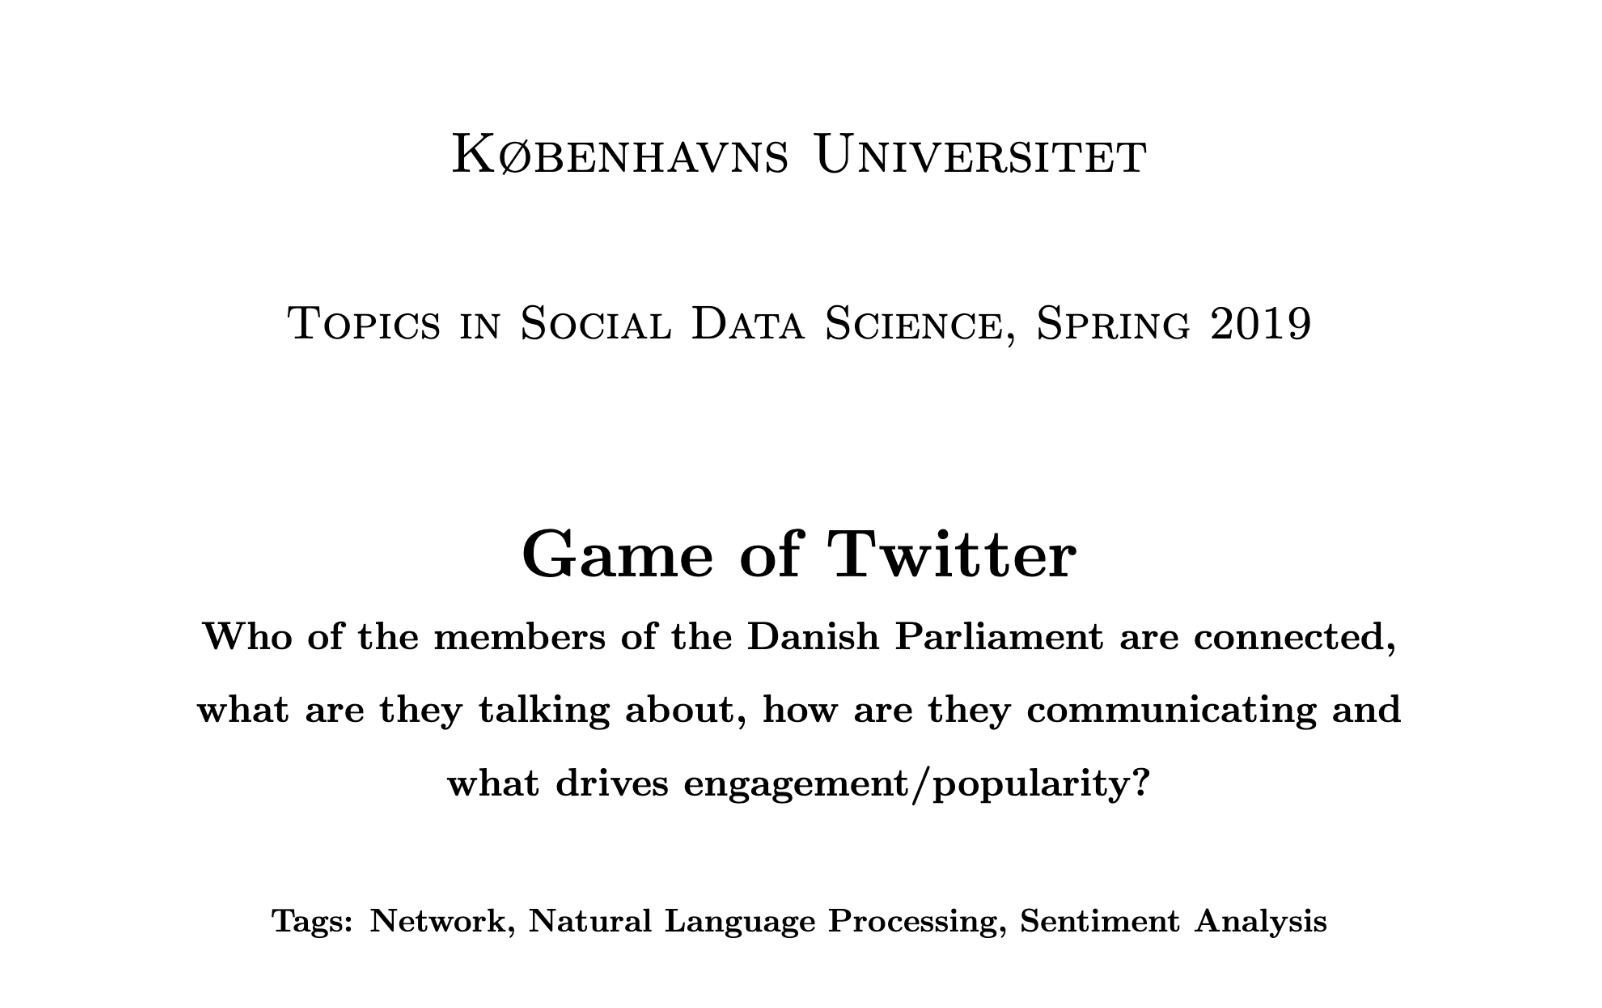

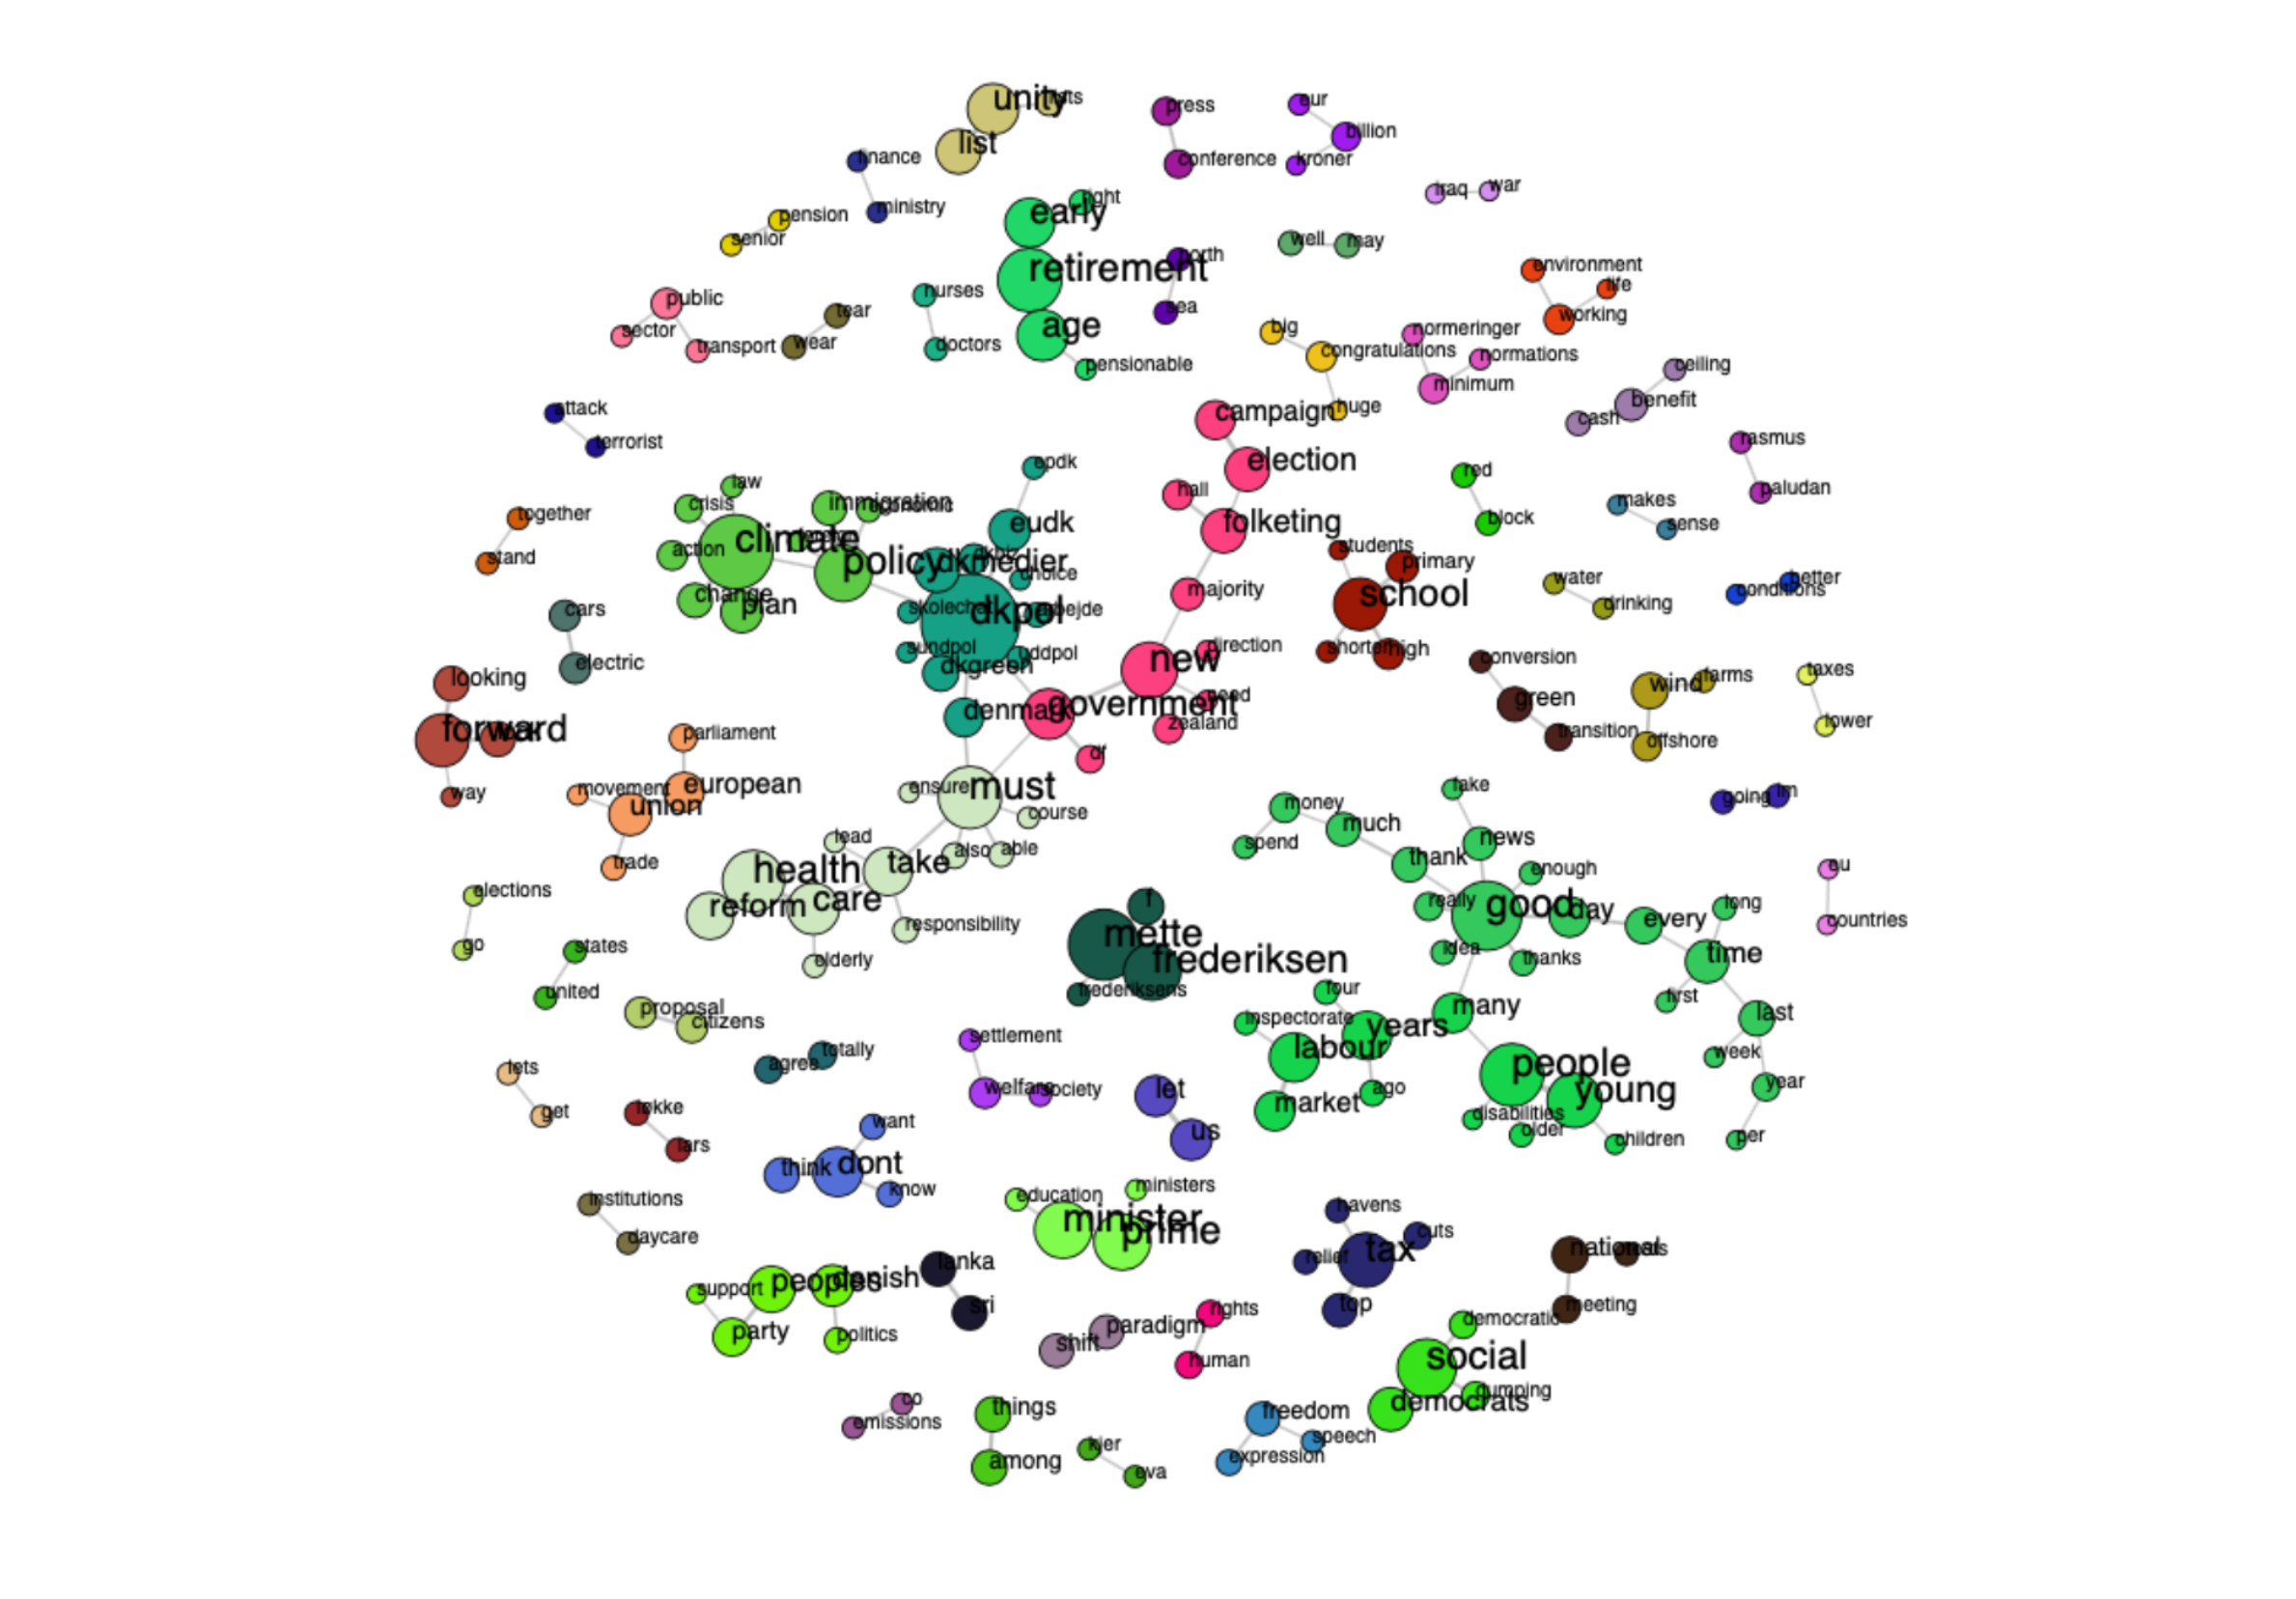

[**Twitter Analysis**](https://github.com/NicklasJohansen/Twitter-Analysis)   
We analyze the behavior of the danish politicians on Twitter up to the Danish General Election in 2019.

For this purpose we did the following:
- We created a network-model in order to investigate inter- and intra party engagements on Twitter. We find evidence that Twitter serve as an echo-champer as politicians mainly engage with politicans from their own or similar parties.
- We create a bi-gram of word to determine which subject were discussed in the given time-frame of the analysis.
- We carried out a sentiment analysis to determine how the respective parties communicate on Twitter.
- We crated a machine learning model predicting the number of likes a Tweet will get.

The repository consist of:
- Written analysis: se the pdf file paper.pdf
- Code: see the jypyter notebook file code.ipynb
- Raw data: see the folder raw_data


## VADER Sentiment Analyzer

NLTK already has a built-in, pretrained sentiment analyzer called VADER (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).

Since VADER is pretrained, you can get results more quickly than with many other analyzers. However, VADER is best suited for language used in social media, like short sentences with some slang and abbreviations. It’s less accurate when rating longer, structured sentences, but it’s often a good launching point.

To use VADER, first create an instance of nltk.sentiment.SentimentIntensityAnalyzer, then use .polarity_scores() on a raw string:



In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Wow, DO is really interesting!")

{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'compound': 0.7955}

You’ll get back a dictionary of different scores. The negative, neutral, and positive scores are related: They all add up to 1 and can’t be negative. The compound score is calculated differently. It’s not just an average, and it can range from -1 to 1. [How is it calculated?](https://blog.quantinsti.com/vader-sentiment/).

How do i use VADER on multiple instances?

In [19]:
data = [
    "Wow, DO is really interesting!",
    "Exam are coming up fuck my life!",
    "My little pony"
]

scores = []

for i in range(len(data)):
    scores.append(sia.polarity_scores(data[i]))

scores

[{'neg': 0.0, 'neu': 0.297, 'pos': 0.703, 'compound': 0.7955},
 {'neg': 0.387, 'neu': 0.613, 'pos': 0.0, 'compound': -0.5848},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]

## AFINN Sentiment Analyzer

THe best library for sentiment analysis in danish is `AFINN`. It is developed by [Finn Årup Nielsen](https://github.com/fnielsen), Associate Professor at the Technical University of Denmark.

In [20]:
from afinn import Afinn
afinn = Afinn(language='da')
afinn.score('Hvis ikke det er det mest afskyelige flueknepperi :(')

-6.0

In [21]:
from afinn import Afinn
afinn = Afinn(language='da', emoticons=True)
afinn.score('Hvis ikke det er det mest afskyelige flueknepperi :(')

-8.0

![](https://media-exp1.licdn.com/dms/image/C4E22AQEYisCDYH2yPw/feedshare-shrink_2048_1536/0/1610449526424?e=1640822400&v=beta&t=5HUsumqt-GQWYqOhBJ9FBKLcRXx-yudfLb---5jmSVs)

![](https://media-exp1.licdn.com/dms/image/C4E22AQEW3RViS2fxUA/feedshare-shrink_2048_1536/0/1610449526830?e=1640822400&v=beta&t=t6_FYuImC32dFN1irYmrHgz9Vl5CxrqruBibmSUUbco)
